<a href="https://colab.research.google.com/github/stewedpeanut/python/blob/main/%E4%BD%9C%E6%A5%AD%E5%85%ADDECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/暑密班/drug200.csv")
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
x = data.iloc[:,:-1]
y = np.array(data.iloc[:,-1:])
dummy_x = pd.get_dummies(x)
dummy_x

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [3]:
from sklearn.model_selection import train_test_split
dummy_x = np.array(dummy_x)
train_x, test_x, train_y, test_y = train_test_split(dummy_x, y, test_size=0.2, random_state=10)

print(f"train_x shape:  {train_x.shape}")
print(f"test_x shape: {test_x.shape}")

train_x shape:  (160, 9)
test_x shape: (40, 9)


In [4]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=10)
dc.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [6]:
from sklearn import metrics
y_pred = dc.predict(test_x)
print("DecisionTree Accuracy: ", metrics.accuracy_score(test_y, y_pred))

from sklearn import tree
tree_plot_1 = tree.export_text(dc, feature_names=["Age","Na_to_K","Sex_F","Sex_M","BP_HIGH","BP_LOW",
                                        "BP_NORMAL","Cholesterol_HIGH","Cholesterol_NORMAL"])
print(tree_plot_1)

DecisionTree Accuracy:  1.0
|--- Na_to_K <= 14.83
|   |--- BP_HIGH <= 0.50
|   |   |--- BP_LOW <= 0.50
|   |   |   |--- class: drugX
|   |   |--- BP_LOW >  0.50
|   |   |   |--- Cholesterol_HIGH <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- Cholesterol_HIGH >  0.50
|   |   |   |   |--- class: drugC
|   |--- BP_HIGH >  0.50
|   |   |--- Age <= 50.50
|   |   |   |--- class: drugA
|   |   |--- Age >  50.50
|   |   |   |--- class: drugB
|--- Na_to_K >  14.83
|   |--- class: DrugY



[Text(0.625, 0.9, 'Na_to_K <= 14.829\nentropy = 1.915\nsamples = 160\nvalue = [75, 17, 13, 10, 45]\nclass = drugA'), Text(0.5, 0.7, 'BP_HIGH <= 0.5\nentropy = 1.728\nsamples = 85\nvalue = [0, 17, 13, 10, 45]\nclass = drugY'), Text(0.25, 0.5, 'BP_LOW <= 0.5\nentropy = 0.684\nsamples = 55\nvalue = [0, 0, 0, 10, 45]\nclass = drugY'), Text(0.125, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 0, 29]\nclass = drugY'), Text(0.375, 0.3, 'Cholesterol_HIGH <= 0.5\nentropy = 0.961\nsamples = 26\nvalue = [0, 0, 0, 10, 16]\nclass = drugY'), Text(0.25, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 0, 0, 16]\nclass = drugY'), Text(0.5, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]\nclass = drugX'), Text(0.75, 0.5, 'Age <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [0, 17, 13, 0, 0]\nclass = drugB'), Text(0.625, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17, 0, 0, 0]\nclass = drugB'), Text(0.875, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]\nclass = drugC'

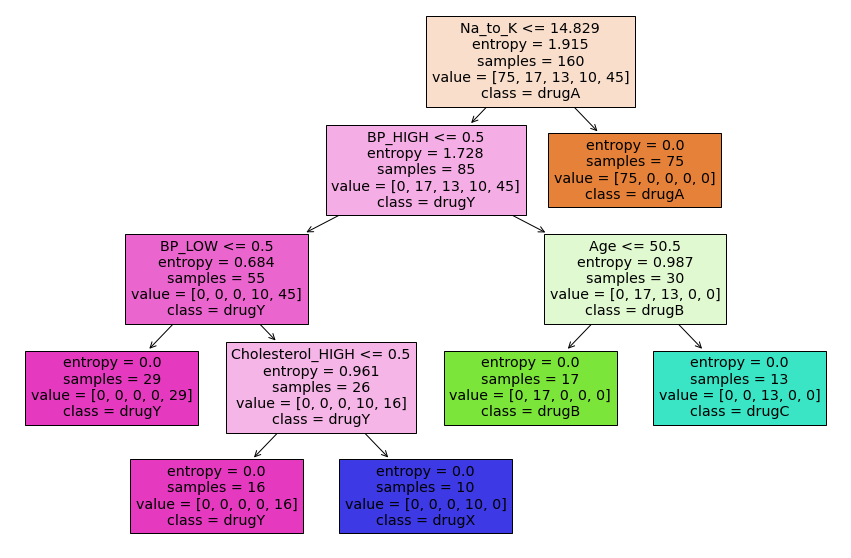

In [10]:
fig = plt.figure(figsize=(15,10))
tree_plot_2 = tree.plot_tree(dc, feature_names=["Age","Na_to_K","Sex_F","Sex_M","BP_HIGH","BP_LOW","BP_NORMAL","Cholesterol_HIGH","Cholesterol_NORMAL"],class_names=['drugA','drugB','drugC','drugX','drugY'],filled=True)
print(tree_plot_2)